In [1]:
'''
Notebook created by: Gabriele Sottocornola
for the M.Sc. class of Data & Text Mining
Università degli studi di Milano-bicocca
'''
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

### Utility Functions

In [2]:
def plot_data(x, y, y_pred=[]):
    plt.plot(x, y, 'go')
    if len(y_pred) > 0:
        plt.plot(x, y_pred, 'r')
    plt.show()
    plt.gcf().clear()

In [3]:
def plot_error(train_error_list, test_error_list, step_list):    
    train_err, = plt.plot(step_list, train_error_list, 'r-', label='Train set')
    test_err, = plt.plot(step_list, test_error_list, 'b-', label='Test set')
    plt.legend(handles=[train_err, test_err])
    plt.xlabel('Training iteration')
    plt.ylabel('MSE')
    plt.show()
    plt.gcf().clear()

In [4]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

### Computation

+ Try to change the parameter of the sample size: what happens to the prediction task if it spans from tens to hundreds of samples?

+ Try to change the number of hidden neurons in your neural network: if you gradually increase the number of neurons from 1 to (let's say) 10K, the predictive error (MSE) on the test set always deacreases?

+ Advanced: Try to include (uncomment) dropout as a regularization technique, what happen to the error plot and the learnt function? Try to add (uncomment) a regularization term (L1 or L2) to the cost function of your network, do you notice some changes in the training process?

In [33]:
### PARAMETERS ###

sample_size = 20
scale_factor = 10
noise_hyper = 0.66

hidden_neurons = 10
num_iter = 10000

#################################################################################################################

x_train = np.random.sample(sample_size) * scale_factor # generate 1D random feature vector
x_train = np.sort(x_train) # sort data for sake of visualization
noise = np.random.normal(0, 1, sample_size) # generate standard noise vector
y_train = np.sin(x_train) + noise_hyper * noise # generate target variable

# x_test = np.random.sample(sample_size) * scale_factor
# x_test = np.sort(x_test)
x_test = x_train 
y_test = np.sin(x_test) # true target class to predict 

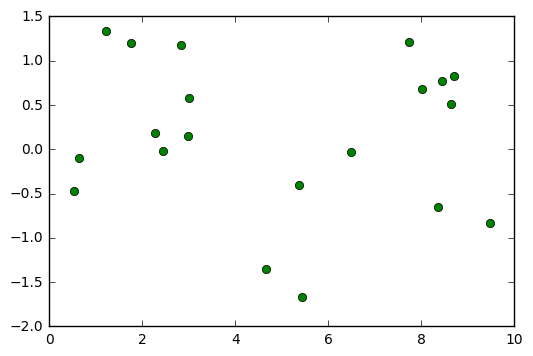

In [25]:
plot_data(x_train, y_train)

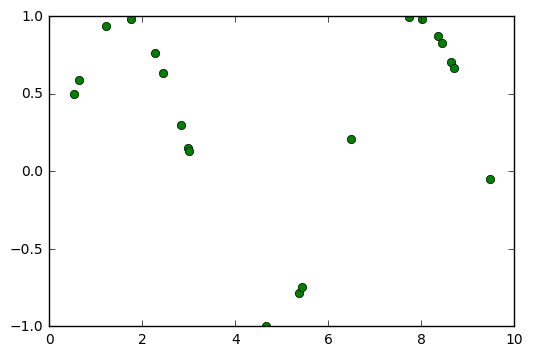

In [26]:
plot_data(x_test, y_test)

In [27]:
# MODEL CONSTRUCTION (COMPUTATION GRAPH)

x_tensor = tf.placeholder(tf.float32, [None, 1]) # input data
y_tensor = tf.placeholder(tf.float32, [None, 1]) # target class

W1 = weight_variable([1, hidden_neurons])
b1 = bias_variable([hidden_neurons])
hidden_layer = tf.nn.relu(tf.matmul(x_tensor, W1) + b1)

keep_prob = tf.placeholder(tf.float32)
# hidden_layer = tf.nn.dropout(hidden_layer, keep_prob)

W2 = weight_variable([hidden_neurons, 1])
b2 = bias_variable([1])
pred_tensor = tf.matmul(hidden_layer, W2) + b2

In [28]:
# LOSS FUNCTION AND TRAINING STEP

norm_hyper = 0.01

MSE = tf.reduce_mean(tf.square(pred_tensor - y_tensor)) # mean-squared error cost function
# MSE = MSE + norm_hyper * (tf.reduce_sum(tf.abs(W1)) + tf.reduce_sum(tf.abs(W2))) # L1 normalization
# MSE = MSE + norm_hyper * (tf.nn.l2_loss(W1) + tf.nn.l2_loss(W2)) # L2 normalization
train_step = tf.train.AdamOptimizer(1e-4).minimize(MSE)

In [29]:
# COMPUTATION PHASE: TRAINING AND INFERENCE

xT_train = x_train.reshape((sample_size,1))
yT_train = y_train.reshape((sample_size,1))
xT_test = x_test.reshape((sample_size,1))
yT_test = y_test.reshape((sample_size,1)) 

train_error_list = list()
test_error_list = list()
step_list = list()

sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

i = 1
while i <= num_iter:
    if i%100 == 0:
        error_train = MSE.eval(feed_dict={x_tensor: xT_train, y_tensor: yT_train, keep_prob : 1.0})
        error_test = MSE.eval(feed_dict={x_tensor: xT_test, y_tensor: yT_test, keep_prob : 1.0})
        #print("step %d, ERROR: %g"%(i, error_train))
        #print("error out-of-sample: %g"%(error_test))
        
        train_error_list.append(error_train)
        test_error_list.append(error_test)
        step_list.append(i)
        
    train_step.run(feed_dict={x_tensor: xT_train, y_tensor: yT_train, keep_prob : 0.5})    
    i += 1

y_pred_train = pred_tensor.eval(feed_dict={x_tensor: xT_train, y_tensor: yT_train, keep_prob : 1.0})
y_pred_test = pred_tensor.eval(feed_dict={x_tensor: xT_test, y_tensor: yT_test, keep_prob : 1.0})

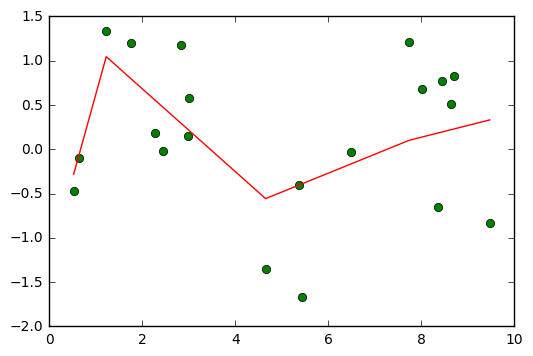

In [30]:
plot_data(x_train, y_train, y_pred_train)

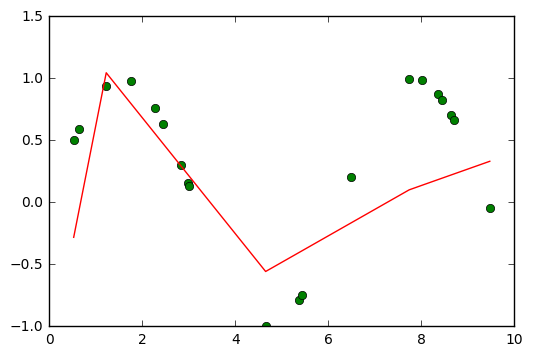

In [31]:
plot_data(x_test, y_test, y_pred_test)

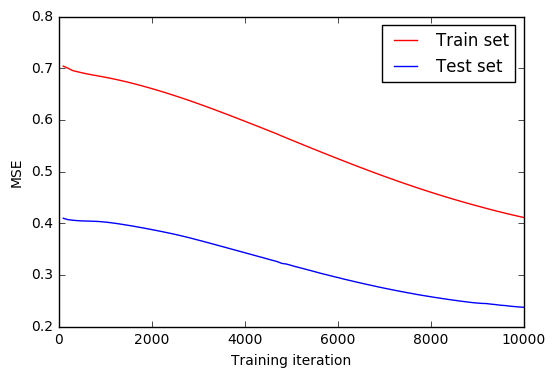

In [32]:
plot_error(train_error_list, test_error_list, step_list)

In [23]:
############################################################################################################################

## Take-aways

+ Artificial Neural Networks are effective to learn/approximate (pointwise) a "complex" function

+ More expressive power - i.e. more neurons in the hidden layer - doesn't always mean better generalization capability (overfitting!!!)

+ Some regularization tricks could help to avoid overfitting (e.g. L1/L2 normalization, dropout...)

+ Take care of train/test error plots to monitor the learning phase throughout the iterations

+ Adding more training data is always an effective method to prevent your model to overfit